<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from numpy.linalg import inv

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


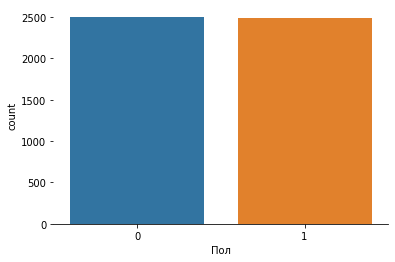

In [7]:
sns.countplot(x='Пол',data=data)
sns.despine(left=True)

Количество мужчин и женщин среди клиентов равно друг другу.

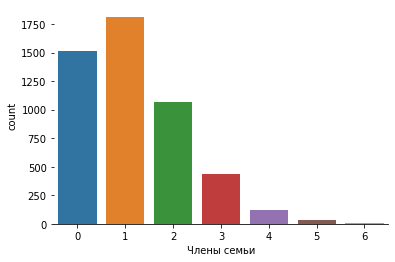

In [8]:
sns.countplot(x='Члены семьи',data=data)
sns.despine(left=True)

Больше всего тех у кого 1 ребёнок и тех у кого детей нет вообще.

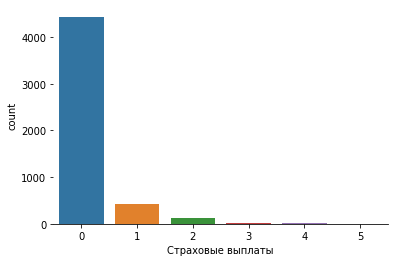

In [9]:
sns.countplot(x='Страховые выплаты',data=data)
sns.despine(left=True)

Количество клиентов, что ещё не получили страховую выплату - составляют львиную долю.

<AxesSubplot:xlabel='Зарплата', ylabel='Count'>

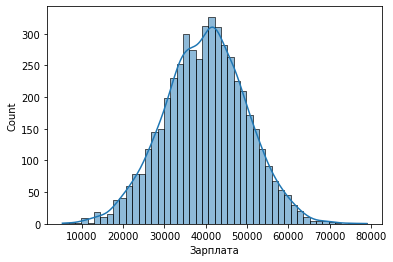

In [10]:
sns.histplot(data=data, x="Зарплата", kde=True)

На графике видно: средняя зарплата среди клиентов ~40000, максимум стремится к 80000, минимум меньше 10000.

<AxesSubplot:xlabel='Возраст', ylabel='Count'>

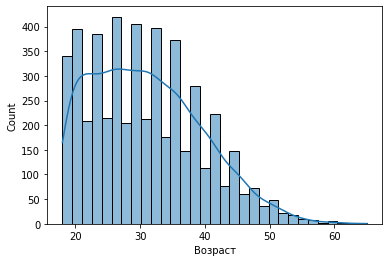

In [11]:
sns.histplot(data=data, x="Возраст", kde=True)

Основной контингент клиентов находится в возрастной категории с 20 до 37 лет.

<AxesSubplot:>

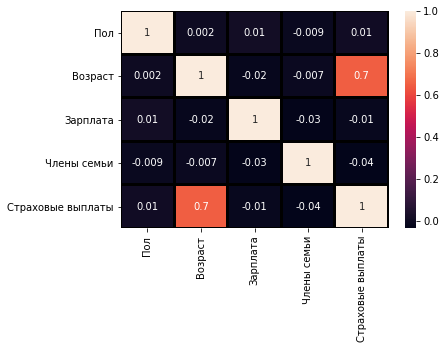

In [12]:
sns.heatmap(data.corr(), annot = True, fmt='.1g', linewidths=2, linecolor='black')

На тепловой карте видна корреляционная зависимость между Страховыми выплатами и Возрастом (0.7)

In [13]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [14]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.3, random_state=12345)

print('Тренировочная выборка:', features_train.shape)
print('Тестовая выборка:', features_test.shape)

Тренировочная выборка: (3500, 4)
Тестовая выборка: (1500, 4)


**ВЫВОД 1:**

В процессе предобработки проделаны следующие шаги:
* Исследованы данные на наличие аномалий, пропусков, исследованы типы данных и прочее;
* Данные разбиты на обучающую и тестовую выборки и готовы для дальнейшей работы над ними.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b. Не изменится.

**Обоснование:** 

Обучающуя выборка представлена как матрица X, в которой строки соответствуют объектам, а столбцы — признакам. Матрица, на которую умножаются признаки - P. Чтобы получить вектор предсказаний a, умножим матрицу X на матрицу P. Формула предсказаний будет иметь следующий вид:

$$
a = XPw
$$

$$
w = (X^T X)^{-1} X^T y = ((XP)^T (XP))^{-1}(XP)^T y
$$

Cвойства матриц:
* Если любую матрицу A умножить на единичную (или наоборот), получится эта же матрица A:

    $$AE = EA = A$$
    
* Обратная для квадратной матрицы A — A^-1, произведение которой на А равно единичной матрице. Умножение может быть в любом порядке:

 $$AA^{-1} = A^{-1} A = E$$
 
* Свойства транспонирования матриц:

$$(AB)^T = A^T B^T $$

* Свойства обратной матрицы:

$$ (AB)^{-1} = A^{-1} B^{-1} $$

* Группировка матриц различным образом:

$$A(BC) = (AB)C$$

С помощью свойства транспонирования расроем скобки:
        
$$
w' = ((XP)^T (XP))^{-1}(XP)^T y
$$

$$
w' = (P^T X^T XP)^{-1}P^TX^T y
$$

Далее используем свойство обратной матрицы:

$$
w' = (P^T (X^T X) P)^{-1}P^TX^T y
$$

$$
w' = P^{-1} (X^T X)^{-1}(P^T)^{-1} P^TX^T y
$$

Применим свойство обратной матрицы:
    
$$
w' = P^{-1} X^{-1}(X^T)^{-1}X^T y
$$

$$
w' = P^{-1}(X^TX)^{-1}X^T y
$$

$$
w' = P^{-1}w
$$

Сделаем подстановку в формаулу предсказаний и получим вид:

$$
a' = XPw'a' = XPP^{-1}a' = Xw = a
$$
    

## Алгоритм преобразования

**Алгоритм**

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 
Для этого нужно провести ленейное проеобразование:
* Для начала нужно сгененировати матрицу P и проверить её на обратимость
* Далее провести проеобразование, для этого X * P
* Проверка восстановления первоначальных данных 
* Проверка алгоритма 

**Обоснование**

Матрицу X с размерностью MxN умножаем на матрицу P с размерностью NxN. Матрица X' будет иметь размерность матрицы X:

$$
X' = XP
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Для обучения применим формулу из предыдущей части проекта:

$$
w' = ((XP)^T (XP))^{-1}(XP)^T y
$$

Для обучения:

$$
a' = XP((XP)^T (XP))^{-1}(XP)^T y
$$

Для проверки качества:

$$
MSE(a'y)
$$

Для дешифровки преобразованную матрицу P умножаем на обратную матрицу $P^{-1}$ :

$$
XPP^{-1} = XE = X
$$

## Проверка алгоритма

In [15]:
#Алгоритм линейной регрессии
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print("Значение метрики R2 =", r2_score(target_test, predictions))

Значение метрики R2 = 0.4305278542485148


In [17]:
# генерация матрицы
matrix = np.random.randint(5, size=(4, 4))
matrix

array([[3, 0, 3, 3],
       [0, 3, 3, 4],
       [3, 0, 0, 2],
       [4, 4, 4, 2]])

In [18]:
# проверка матрицы на обратимость
np.linalg.inv(matrix)

array([[ 0.        , -0.14814815,  0.18518519,  0.11111111],
       [-0.33333333,  0.11111111,  0.11111111,  0.16666667],
       [ 0.33333333, -0.07407407, -0.40740741,  0.05555556],
       [ 0.        ,  0.22222222,  0.22222222, -0.16666667]])

In [19]:
features_train = features_train @ matrix
features_test = features_test @ matrix

In [20]:
#проверка на преобразованных признаках
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 =',r2_score(target_test, predictions))

Значение метрики R2 = 0.43052785421094375


Значение модели машинного обучения на преобразованных данных не ухудшилось. 

**ОБЩИЙ ВЫВОД:**

- Проведена предобработка данных:
   данные проеверены на наличие аномалий, пропусков и подготовлены для последующей работы;
- Обоснована связь параметров линейной регрессии в исходной задаче и в преобразованной;
- Описан алгоритм преобразования данных для решения задачи;
- Применив матричные операции запрограммировали алгоритм:
     - Реализован алгоритм линейной регрессии;
     - Сгенерирована матрица;
     - Матрица проверена на обратимость;
     - Проведена проверка на преобразованных признаках.

Качество линейной регрессии не отличается до и после преобразования. 

Данные успешно зашифрованы - цель проекта достигнута!